# Homework 1 Part 2

**Due: Sunday, September 17, 11:59 PM**

This is an individual assignment.

## Description

Create or edit this Jupyter Notebook to answer the questions below. Use simulations to answer these questions. An analytical solution can be useful to check if your simulation is correct but analytical solutions alone will not be accepted as a solution to a problem.

In [2]:
import random
import numpy.random as npr
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Problem 7

Consider repeatedly rolling a fair 6-sided die.

1. Create a simulation to compute the probability that the top face will be 6 at least once on three rolls of the die?
2. Create a simulation to compute the probability that the top face will be 6 at least once on 8 rolls of the die?
3. Create a simulation to compute how many rolls of the die would you have to do to be 90% confident that you would see at least one 6?
4. Using the formula you have computed in problem 2 part 4, make a Python function that takes in the target value $p$ and outputs the required number of rolls of an integer. 
    1. Find the values for $p=0.95$ and $p=0.99$. 
    2. Use your simulation to verify that the number of rolls you specified is sufficient to achieve $p\geq 0.95$.

In [2]:
# rolling a fair die
num_of_sims = 10000
die = [1,2,3,4,5,6]
three_roll_results = 0
eight_roll_results = 0
for i in range(num_of_sims):
    for j in range(3):
        if random.choice(die) == 6:
            three_roll_results += 1
            break
    # No we roll the die eight times
    for j in range(8):
        if random.choice(die) == 6:
            eight_roll_results += 1
            break
print("Probability of rolling a six in three rolls: ", three_roll_results/num_of_sims)
print("Probability of rolling a six in eight rolls: ", eight_roll_results/num_of_sims)
# We know the probability of rolling a six in one roll is 1/6 and 5/6 for not rolling a six, we can use the formula n = ln(1-p)/ln(5/6) to find the expected number of rolls to get a six
def expected_num_of_rolls(p):
    return np.log(1-p)/np.log(5/6)
print("Expected number of rolls to get a six with 0.90 probability: ", expected_num_of_rolls(0.90), " rolls")
print("Expected number of rolls to get a six with 0.95 probability: ", expected_num_of_rolls(0.95), " rolls")
print("Expected number of rolls to get a six with 0.99 probability: ", expected_num_of_rolls(0.99), " rolls")
# knowing the number of rolls needed to get a six 0.95 times, we need to verify this with a simulation
verification_event = 0
for i in range(num_of_sims):
    rolls = np.ceil(expected_num_of_rolls(0.95))
    for j in range(rolls.astype(int)):
        if random.choice(die) == 6:
            verification_event += 1
            break
print("Probability of rolling a six in a given level of certainity of verified by: ", verification_event/num_of_sims)

Probability of rolling a six in three rolls:  0.4218
Probability of rolling a six in eight rolls:  0.7702
Expected number of rolls to get a six with 0.90 probability:  12.62925313651334  rolls
Expected number of rolls to get a six with 0.95 probability:  16.431037153437263  rolls
Expected number of rolls to get a six with 0.99 probability:  25.258506273026672  rolls
Probability of rolling a six in a given level of certainity of verified by:  0.9576


## Problem 8

Create a simulation function where you will roll a fair 6-sided die 30 times and count the number of times the face $x$ comes up on the top face of the die. 

* In your simulation, create a list that will store the number of times it came up $x$ on the top face of the die.
* Create a plot of unique counts vs their relative frequency

Using your simulation function, run it for:

1. $x=3$

2. $x=[5,6]$, that is, probability of observing a 5 or a 6 on the top face.

3. $x=[1,2,3]$, that is, probability of observing a 1, 2 or 3 on the top face.

For both cases, comment the plotting results. For a *sufficient* amount of simulations, does it behave as *expected*?

Probability of rolling a 3 in 30 rolls:  4
Probability of rolling a 5 or 6 in 30 rolls:  12
Probability of rolling a 1, 2, or 3 in 30 rolls:  15


Text(0, 0.5, 'Number of times rolled')

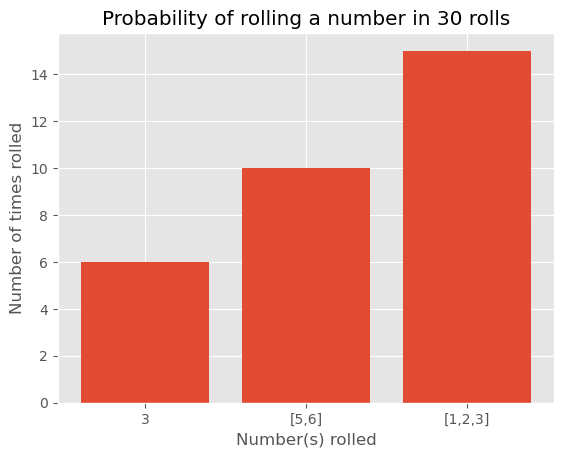

In [5]:
# create a functions that counts the number of times any number in a list is rolled
def sim_thirty_rolls(faces, num_of_sims=30):
    die = [1,2,3,4,5,6]
    results = 0
    for i in range(num_of_sims):
        if random.choice(die) in faces:
            results += 1
    return results
print("Probability of rolling a 3 in 30 rolls: ", sim_thirty_rolls([3]))
print("Probability of rolling a 5 or 6 in 30 rolls: ", sim_thirty_rolls([5,6]))
print("Probability of rolling a 1, 2, or 3 in 30 rolls: ", sim_thirty_rolls([1,2,3]))
x_axis = ["3","[5,6]","[1,2,3]"]
y_axis = [sim_thirty_rolls([3]), sim_thirty_rolls([5,6]), sim_thirty_rolls([1,2,3])]
plt.bar(x_axis, y_axis)
plt.title("Probability of rolling a number in 30 rolls")
plt.xlabel("Number(s) rolled")
plt.ylabel("Number of times rolled")

## Problem 9

Suppose that you have a bag with 3 coins. One of them is a fair coin, but the others are biased trick coins. When flipped, the three coins come up heads with probability $\frac{1}{2}$, $\frac{2}{3}$, and $\frac{1}{10}$, respectively.

Consider the experiment where you pick one coin at random and flip it three times. Let $H_i$ be the event that the coin comes up heads on flip $i$. What is the probability of the outcome $H_1\cap H_2\cap \overline{H_3}$?

In [4]:
# sim a bag of 3 coins with one fair coin and two coins with a heads probability of 2/3, and 1/10 respectively
fair_coin = ['H', 'T']
two_thirds_coin = ['H', 'H', 'T']
one_tenth_coin = ['H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']
event_count = 0
num_of_sims = 10000
for i in range(num_of_sims):
    coin = random.choice([fair_coin, two_thirds_coin, one_tenth_coin])
    if random.choice(coin) == 'H':
        if random.choice(coin) == 'H':
            if random.choice(coin) == 'T':
                event_count += 1
print("Probability of getting 2 heads and a tail: ", event_count/num_of_sims)

Probability of getting 2 heads and a tail:  0.0934


## Problem 10

In what follows, apply a significance value $\alpha = 0.01$. That is, there must be less than a 1% probability of seeing such an extreme value under the null hypothesis before we are willing to conclude that the null hypothesis is not reasonable.

* If a 6-sided die is rolled 10 times and all the values are <=4, should we feel confident that the die is not fair (i.e., reject the null hypothesis with $p=0.01$)?

* Conduct the above simulation using a python function.

In [5]:
die = [1,2,3,4,5,6]
num_of_sims = 100_000
event_count = 0 
# the event is rolling all values 4 and under on a die rolled 10 times
for i in range(num_of_sims):
    count = 0
    for j in range(10):
        if random.choice(die) <= 4:
            count += 1
    if count == 10:
        event_count += 1


print("Probability of rolling all values 4 and under on a die rolled 10 times: ", event_count/num_of_sims)

Probability of rolling all values 4 and under on a die rolled 10 times:  0.01701


## Problem 11

Consider the experiment where you pick 3 cards at random from a deck of 52 playing cards (13 cards per suit) **without replacement**, i.e., at each card selection you will not put it back in the deck, and so the number of possible outcomes will change for each new draw.

Let $D_i$ denote the event the card is diamonds in the $i$th draw.

Build a simulation to compute the following probabilities:

1. $P(D_1)$

2. $P(D_1 \cap D_2)$

3. $P(D_1 \cap D_2 \cap \overline{D_3})$

4. $P(D_3|D_1\cap D_2)$

*Note: to sample from a set **without replacement**, consider use the function ```numpy.random.choice``` by controling the parameter ```replace```*.

In [6]:

exp_1_count = 0
exp_2_count = 0
exp_3_count = 0
exp_4_count = 0
num_of_sims = 10_000
for i in range(num_of_sims):

    # We need to create a deck of cards in a list but on track the suit
    deck = ['H','D','C','S']*13
    if random.choice(deck) == 'D':
        exp_1_count += 1 
    # We remove the first diamond from the deck so this is not a replacement
    if np.random.choice(deck, 2, replace=False).tolist() == ['D','D']:
        exp_2_count += 1
    # Now without replacement we also want to understand the probability of drawing two diamonds and then anythign else
    exp_3_draw = np.random.choice(deck, 3, replace=False).tolist()
    if exp_3_draw[0] == 'D' and exp_3_draw[1] == 'D' and exp_3_draw[2] != 'D':
        exp_3_count += 1
    # Now we want to understand the conditional prob of drawing a third diamond given we have already drawn two diamonds
    # Given that we need to find the probability of drawing a diamond given we have already drawn two diamonds, we can remove the two diamonds from the deck and then draw one card
    if np.random.choice(deck, 3, replace=False).tolist() == ['D','D','D']:
        exp_4_count += 1
print("Probability of drawing a diamond on the first draw: ", exp_1_count/num_of_sims)
print("Probability of drawing two diamonds on the first two draws: ", exp_2_count/num_of_sims)
print("Probability of drawing two diamonds on the first two draws and then any card on the third draw: ", exp_3_count/num_of_sims)
print("Probability of drawing a diamond on the third draw given we have already drawn two diamonds: ", exp_4_count/num_of_sims)
    


Probability of drawing a diamond on the first draw:  0.2432
Probability of drawing two diamonds on the first two draws:  0.0585
Probability of drawing two diamonds on the first two draws and then any card on the third draw:  0.0447
Probability of drawing a diamond on the third draw given we have already drawn two diamonds:  0.0138


## Problem 12

Suppose that you have 6 coins: 2 fair coins and 4 unfair coins. When flipped, the coins flip heads with probability 0.5, 0.5, 0.8, 0.2, 0.1 and 0.3, respectively. Consider the experiment where you choose a coin at random and flip it twice. Let $E$ be the event that 2 heads were observed. Compute $P(\text{fair coin}|E)$.

*Note: to encode specific probabilily of flipping heads, you may consider using the function ```numpy.random.choice``` by controlling the parameter ```p```.*

In [7]:
# We are going to use the p parameter in the numpy choice function to create a weighted coin
# We will be using the probability of heads as the p parameter
p_list = [0.5,0.5,0.8,0.2,0.1,0.3] # list of probabilities of heads
num_of_sims = 10_000
# We are counting the probability of getting a heads twice in a row
event_count = 0
for i in range(num_of_sims):
    p_of_heads = np.random.choice(p_list) 
    if np.random.choice(['H','T'], 2, p=[p_of_heads, 1-p_of_heads]).tolist() == ['H','H']:
        event_count += 1
print("Probability of getting a heads twice in a row: ", event_count/num_of_sims)

Probability of getting a heads twice in a row:  0.2183


# Submission Instructions:

When you are done with the exercises in this notebook, upload a PDF or your results to Canvas.  To create the PDF with your code and results, you can use the following procedure:

1. Go to Kernel
2. Click Restart and Run All
3. Check over the notebook to make sure everything still looks right

**At this point, you may be able to just choose "Print" from JupyterLab's File menu and then print to PDF (OS dependent). If everything is correct in the PDF version, then upload that PDF to the assignment in Canvas.**

**If your PDF is missing any of your outputs, you can use the following procedure:**

4. Next, click File at the top on the tool bar below Jupyter icon
5. Click Save and Export Notebook as... and choose HTML
6. The HTML file will either open in a new tab/window or be downloaded to your Downloads folder. Open it if it is in the Downloads folder
7. Print the HTML file to PDF (how to do this is OS dependent). Make sure to save it to somewhere you can find it
8. Open the PDF to make sure that everything looks right and that nothing is cut off
9. Upload both the PDF and ipynb files to the Canvas assignment